In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv("Salaries.csv")
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [4]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [5]:
df.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


In [6]:
df.drop(columns=['Benefits','Notes','Status'],inplace=True)


In [7]:
data=df

In [9]:
data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,326373.19,326373.19,2011,San Francisco


In [11]:
df=data

In [13]:
df.JobTitle.value_counts()

Transit Operator                                  7036
Special Nurse                                     4389
Registered Nurse                                  3736
Public Svc Aide-Public Works                      2518
Police Officer 3                                  2421
                                                  ... 
CHIEF HOUSING INSPECTOR                              1
TRAFFIC SIGNAL OPERATOR                              1
COURT COMPUTER FACILITIES COORDINATOR                1
AUTOMOTIVE BODY AND FENDER WORKER SUPERVISOR I       1
VICTIM & WITNESS TECHNICIAN                          1
Name: JobTitle, Length: 2159, dtype: int64

In [15]:
df=df[['BasePay','OvertimePay','OtherPay','TotalPay']]

In [17]:
df.head()

,BasePay,OvertimePay,OtherPay,TotalPay
0,167411.18,0.0,400184.25,567595.43
1,155966.02,245131.88,137811.38,538909.28
2,212739.13,106088.18,16452.6,335279.91
3,77916.0,56120.71,198306.9,332343.61
4,134401.6,9737.0,182234.59,326373.19


In [19]:
df.describe()

,TotalPay
count,148654.000000
mean,74768.321972
std,50517.005274
min,-618.130000
25%,36168.995000
50%,71426.610000
75%,105839.135000
max,567595.430000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   BasePay      148049 non-null  object 
 1   OvertimePay  148654 non-null  object 
 2   OtherPay     148654 non-null  object 
 3   TotalPay     148654 non-null  float64
dtypes: float64(1), object(3)
memory usage: 4.5+ MB


In [23]:
df.BasePay.unique()

array([167411.18, 155966.02, 212739.13, ..., '6.04', '15.5',
       'Not Provided'], dtype=object)

In [26]:
df.BasePay.replace('Not Provided',np.nan)

0         167411.18
1         155966.02
2         212739.13
3           77916.0
4          134401.6
            ...    
148649            0
148650          NaN
148651          NaN
148652          NaN
148653            0
Name: BasePay, Length: 148654, dtype: object

In [32]:
df.BasePay = pd.to_numeric(df.BasePay,errors='coerce')
df.OvertimePay = pd.to_numeric(df.OvertimePay,errors='coerce')
df.TotalPay = pd.to_numeric(df.TotalPay,errors='coerce')
df.OtherPay = pd.to_numeric(df.OtherPay,errors='coerce')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   BasePay      148045 non-null  float64
 1   OvertimePay  148650 non-null  float64
 2   OtherPay     148650 non-null  float64
 3   TotalPay     148654 non-null  float64
dtypes: float64(4)
memory usage: 4.5 MB


In [37]:
df.dropna(inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148045 entries, 0 to 148653
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   BasePay      148045 non-null  float64
 1   OvertimePay  148045 non-null  float64
 2   OtherPay     148045 non-null  float64
 3   TotalPay     148045 non-null  float64
dtypes: float64(4)
memory usage: 5.6 MB


In [42]:
df=df[df>0]
df.describe()

,BasePay,OvertimePay,OtherPay,TotalPay
count,146736.000000,71324.000000,106731.000000,147968.000000
mean,66917.130321,10558.389065,5056.916232,75096.914039
std,42491.578949,14678.479153,9059.225070,50393.774930
min,6.040000,0.020000,0.300000,0.300000
25%,35411.025000,1587.190000,624.000000,37075.577500
50%,65258.010000,5048.865000,2002.890000,71666.350000
75%,94984.072500,13360.790000,6274.455000,106062.822500
max,319275.010000,245131.880000,400184.250000,567595.430000


In [44]:
df.isnull().sum()

BasePay         1309
OvertimePay    76721
OtherPay       41314
TotalPay          77
dtype: int64

In [46]:
df.dropna(inplace=True)

In [48]:
df.isnull().sum()


BasePay        0
OvertimePay    0
OtherPay       0
TotalPay       0
dtype: int64

In [51]:
df

,BasePay,OvertimePay,OtherPay,TotalPay
1,155966.02,245131.88,137811.38,538909.28
2,212739.13,106088.18,16452.60,335279.91
3,77916.00,56120.71,198306.90,332343.61
4,134401.60,9737.00,182234.59,326373.19
5,118602.00,8601.00,189082.74,316285.74
...,...,...,...,...
147467,1182.12,487.38,44.03,1713.53
147535,1160.08,426.15,15.15,1601.38
147658,1282.97,36.66,49.85,1369.48
147659,426.44,273.24,431.56,1131.24


In [53]:
df.describe()

,BasePay,OvertimePay,OtherPay,TotalPay
count,64311.000000,64311.000000,64311.000000,64311.000000
mean,77011.308739,11376.903410,6446.812667,94835.024816
std,33783.047127,15095.864216,9325.977115,46127.006918
min,31.360000,0.020000,0.590000,192.430000
25%,55026.010000,2002.895000,1170.135000,62242.995000
50%,70547.000000,5798.180000,3739.980000,87419.480000
75%,104050.425000,14660.640000,8636.530000,125704.520000
max,318835.490000,245131.880000,203735.920000,538909.280000


(array([5.5000e+03, 1.8650e+04, 2.1291e+04, 1.4188e+04, 4.1790e+03,
        3.8400e+02, 9.8000e+01, 1.4000e+01, 6.0000e+00, 1.0000e+00]),
 array([3.13600000e+01, 3.19117730e+04, 6.37921860e+04, 9.56725990e+04,
        1.27553012e+05, 1.59433425e+05, 1.91313838e+05, 2.23194251e+05,
        2.55074664e+05, 2.86955077e+05, 3.18835490e+05]),
 <BarContainer object of 10 artists>)

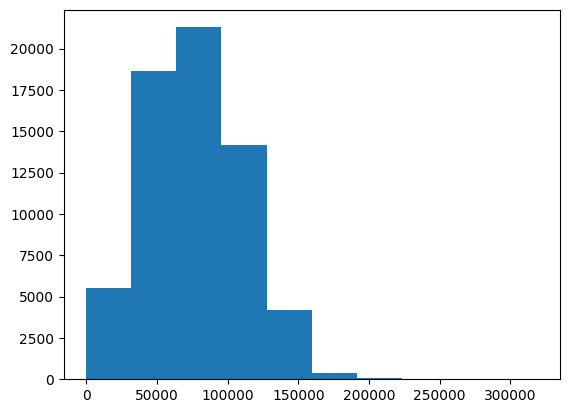

In [63]:
plt.hist(df.BasePay)

(array([5.5764e+04, 6.2910e+03, 1.6600e+03, 4.5700e+02, 1.0000e+02,
        2.8000e+01, 5.0000e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([2.00000000e-02, 2.45132060e+04, 4.90263920e+04, 7.35395780e+04,
        9.80527640e+04, 1.22565950e+05, 1.47079136e+05, 1.71592322e+05,
        1.96105508e+05, 2.20618694e+05, 2.45131880e+05]),
 <BarContainer object of 10 artists>)

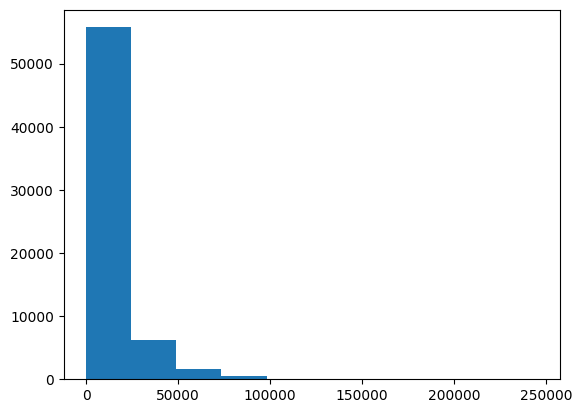

In [66]:
plt.hist(df.OvertimePay)

(array([6.1621e+04, 2.1870e+03, 2.1200e+02, 9.3000e+01, 8.5000e+01,
        6.6000e+01, 2.9000e+01, 9.0000e+00, 5.0000e+00, 4.0000e+00]),
 array([5.90000000e-01, 2.03741230e+04, 4.07476560e+04, 6.11211890e+04,
        8.14947220e+04, 1.01868255e+05, 1.22241788e+05, 1.42615321e+05,
        1.62988854e+05, 1.83362387e+05, 2.03735920e+05]),
 <BarContainer object of 10 artists>)

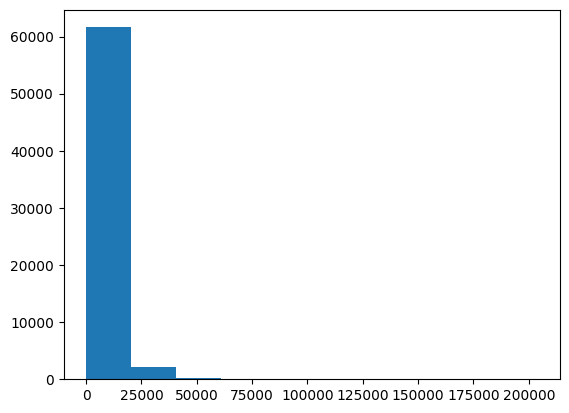

In [69]:
plt.hist(df.OtherPay)

In [71]:
mini= df.quantile(0.2)
maxi=df.quantile(0.8)

In [73]:
df=df[(df>mini)&(df<maxi)]

In [75]:
df.isnull().sum()

BasePay        25834
OvertimePay    25726
OtherPay       25728
TotalPay       25726
dtype: int64

In [78]:
df.dropna(inplace=True)

In [79]:
df.isnull().sum()

BasePay        0
OvertimePay    0
OtherPay       0
TotalPay       0
dtype: int64

In [81]:
df.describe()

,BasePay,OvertimePay,OtherPay,TotalPay
count,16490.000000,16490.000000,16490.000000,16490.000000
mean,74325.968127,7209.547662,4287.412163,85822.927952
std,15668.205247,4516.734197,2558.093146,17497.638292
min,51493.570000,1491.380000,873.930000,57654.170000
25%,61948.120000,3392.675000,2003.277500,71963.365000
50%,68885.550000,6015.355000,3862.040000,82305.105000
75%,86679.000000,10358.827500,6082.077500,99339.642500
max,110223.060000,18052.160000,10396.470000,133805.010000


In [92]:
df.reset_index(inplace=True)
df

,index,BasePay,OvertimePay,OtherPay,TotalPay
0,3745,105934.68,17869.50,9752.35,133556.53
1,3797,108519.07,16733.35,7838.09,133090.51
2,3836,105934.66,16605.21,10160.18,132700.05
3,3956,106065.20,16888.41,9146.86,132100.47
4,4016,105697.96,18013.55,7901.60,131613.11
...,...,...,...,...,...
16485,137212,53151.86,3075.45,8780.33,65007.64
16486,137268,54456.67,1647.43,8374.15,64478.25
16487,137357,54872.03,1557.68,7527.71,63957.42
16488,137435,55080.72,3357.44,4861.17,63299.33


(array([2100., 2565., 3643., 1382., 1504., 1215., 1328., 1132.,  733.,
         888.]),
 array([ 51493.57 ,  57366.519,  63239.468,  69112.417,  74985.366,
         80858.315,  86731.264,  92604.213,  98477.162, 104350.111,
        110223.06 ]),
 <BarContainer object of 10 artists>)

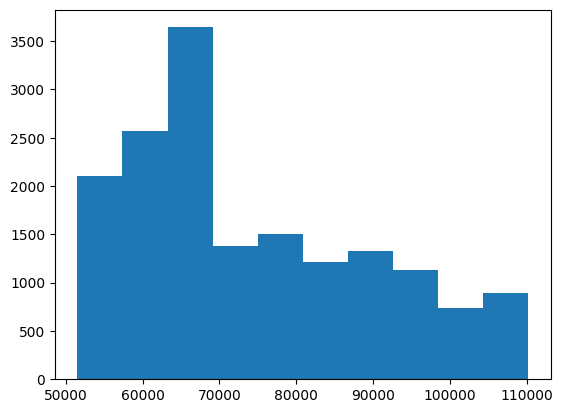

In [84]:
plt.hist(df.BasePay)

(array([3590., 2429., 1969., 1828., 1838., 1384., 1129.,  945.,  782.,
         596.]),
 array([  873.93 ,  1826.184,  2778.438,  3730.692,  4682.946,  5635.2  ,
         6587.454,  7539.708,  8491.962,  9444.216, 10396.47 ]),
 <BarContainer object of 10 artists>)

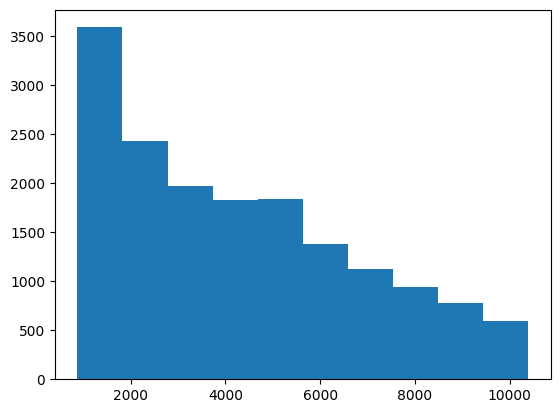

In [86]:
plt.hist(df.OtherPay)

(array([3640., 2931., 2199., 1788., 1375., 1166., 1022.,  892.,  739.,
         738.]),
 array([ 1491.38 ,  3147.458,  4803.536,  6459.614,  8115.692,  9771.77 ,
        11427.848, 13083.926, 14740.004, 16396.082, 18052.16 ]),
 <BarContainer object of 10 artists>)

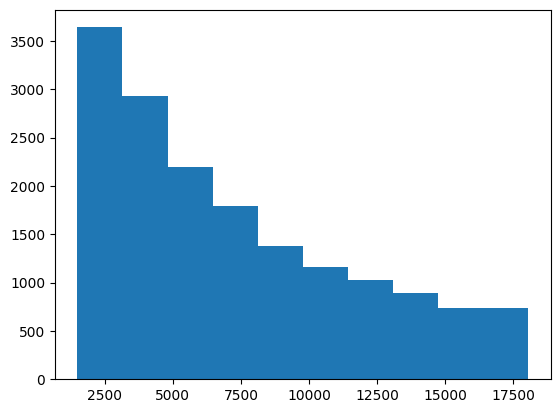

In [88]:
plt.hist(df.OvertimePay)

(array([1835., 2674., 3058., 2349., 1708., 1582., 1468., 1125.,  568.,
         123.]),
 array([ 57654.17 ,  65269.254,  72884.338,  80499.422,  88114.506,
         95729.59 , 103344.674, 110959.758, 118574.842, 126189.926,
        133805.01 ]),
 <BarContainer object of 10 artists>)

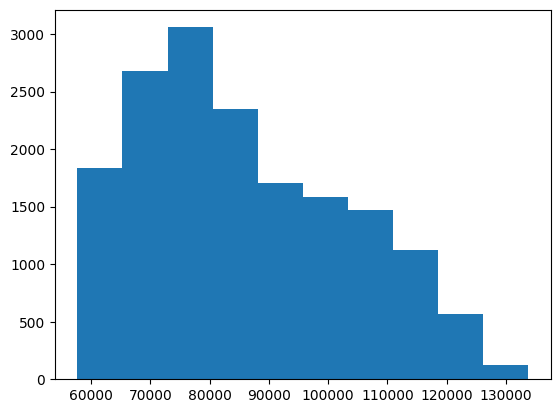

In [90]:
plt.hist(df.TotalPay)